# **Sources:**
https://www.bmc.com/blogs/keras-neural-network-classification/
https://keras.io/layers/about-keras-layers/
https://towardsdatascience.com/logistic-regression-from-scratch-with-numpy-da4cc3121ece
https://blog.goodaudience.com/logistic-regression-from-scratch-in-numpy-5841c09e425f
https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-logistic-regression-c0ae25509feb

In [0]:
%tensorflow_version 2.x
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as ra 

# **HW3 Pt 1**
Implement the function get_random_data(w, b, mu, sigma, m) that generates random data for logisitic regression with two features features x_1 and x_2. This function should return the array data of shape (m, 2) and the array labels of shape (m, 1).


In [0]:

def get_random_data(w, b, mu, sigma, m):
  
  # Data and Labels vectors
  data   = np.empty((m,2))
  labels = np.empty((m,1))

  for x in range(0, m):
    c = ra.random()
    if(c < .5):
      c = 0
    elif(c >= .5):
      c = 1
    
    # Generate features and n with normal distribution
    x_1 = np.random.uniform(0,1)
    n = np.random.default_rng().normal(mu, sigma)
    x_2 = w * x_1 + b + (-1)**c * n

    data[x][0]   = x_1
    data[x][1]   = x_2
    labels[x][0] = c
  return data, labels

def display_random_data(data, labels):
  # Create an array for colors initially blank
  colors = ["" for x in range(len(labels))]

  # If label is 0, color is blue. If label is 1, color is red.
  for i in range(len(labels)):
    current_label = labels.T[0][i]
    if(current_label == 1):
      colors[i] = 'r'
    else:
      colors[i] = 'b'

  # Plot the data and labels
  plt.scatter(data[:,0], data[:,1], c=colors, marker="o")


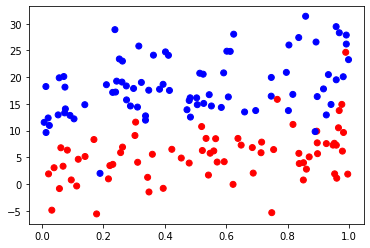

In [336]:
# Using a large value for mu and sigma
data, labels = get_random_data(5,10,7,5,150)
display_random_data(data, labels)

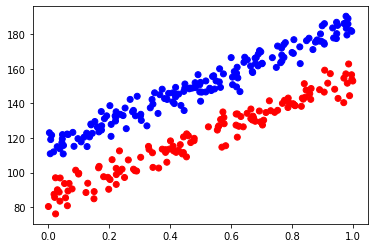

In [337]:
# Using a large value for mu and a small value for sigma
data, labels = get_random_data(70,100,15,5,300)
display_random_data(data, labels)

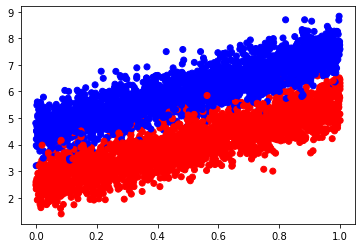

In [338]:
# Using a small value for mu and sigma
data, labels = get_random_data(3,3.5,1,.5,5000)
display_random_data(data, labels)

In [0]:
weight = 3
bias = 3.5
m = 5000

training = (int)(0.8 * m)

data_train   = data[:training]
label_train   = labels[:training]
data_test    = data[training:]
label_test    = labels[training:]

# **HW3 Pt 2**
Create a Keras to implement logistic regression with two features and train it with the data generated in Problem 1. The loss should be the binary cross entropy loss.

In [340]:
# Create the model with all the correct layers
model = models.Sequential()
model.add(layers.Dense(1, 
          activation='sigmoid', 
          input_shape=(2,)))
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary(
    
)
# Train model and then evaulate it
model.fit(data_train, label_train, epochs=250, validation_data = (data_test, label_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
125/125 [==============================] - 0s 2ms/step - loss: 1.0995 - accuracy: 0.5042 - val_loss: 0.9404 - val_accuracy: 0.5050
Epoch 2/250
125/125 [==============================] - 0s 2ms/step - loss: 0.8341 - accuracy: 0.4940 - val_loss: 0.7416 - val_accuracy: 0.4870
Epoch 3/250
125/125 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.5305 - val_loss: 0.6698 - val_accuracy: 0.5800
Epoch 4/250
125/125 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.6235 - val_loss: 0.6531 - val_accuracy: 0.6050
Epoch 5/250
125/125 [==============================] - 0s 2ms/step - loss: 0.6407 

In [341]:
test_loss, test_acc = model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.0999 - accuracy: 0.9790


In [342]:
test_acc

0.9789999723434448

**Model is 75% Accurate**

In [343]:
test_loss

0.09993154555559158

In [0]:
dense_weights, b = model.get_weights()

In [0]:
weight1 = dense_weights[0][0]

In [0]:
weight2 = dense_weights[1][0]

In [0]:
new_bias = b[0]

In [0]:
weights = np.zeros(2)

In [0]:
weights[0] = weight1
weights[1] = weight2

In [350]:
weights

array([10.18984413, -3.39485741])

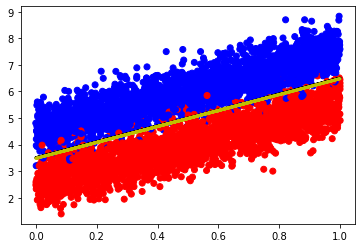

In [351]:
display_random_data(data, labels)
x = data[:,0]
y = weight * x + bias
plt.plot(x, y, color='black', linewidth=3)

new_y = weights[0]*x + b
x2 = -1*((weights[0]*x1)+new_bias)/weights[1]
plt.plot(x1, x2, color='y', linewidth=3)

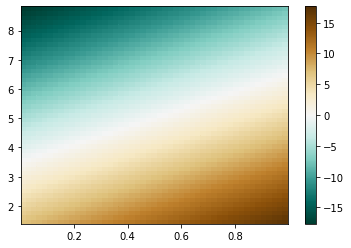

In [352]:
def create_heatmap(weights, bias, data):
  d = data.T
  
  x_1 = pd.DataFrame(d[0][:])
  x_2 = pd.DataFrame(d[1][:])

  l = labels.T
  c = pd.DataFrame(l[0][:])

  df = pd.concat([x_1, x_2, c], axis = 1)
  df.columns = ['x_1', 'x_2', 'c']

  y, x = np.meshgrid(np.linspace(df['x_2'].min(), df['x_2'].max()), np.linspace(df['x_1'].min(), df['x_1'].max()))
  z = bias+y*weights[1]+x*weights[0]
  z = z[:-1, :-1]
  maxz, minz = np.abs(z).max(), -1*np.abs(z).max()

  hm, axis = plt.subplots()
  c = axis.pcolormesh(x, y, z, vmin=minz, vmax=maxz, cmap='BrBG_r')
  axis.axis([x.min(), x.max(), y.min(), y.max()])
  hm.colorbar(c, ax=axis)

create_heatmap(weights, new_bias, data)

# **HW3 Pt 3**
Use numpy to implement a logistic regression model from scratch and train it with the data generated as in Problem 1.

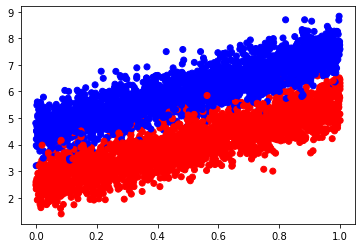

In [353]:
display_random_data(data, labels)

In [0]:
# This function returns values between 0 and 1.
def sigmoid(x, w):
  z = x.dot(w)
  return 1.0 / (1 + np.exp(-z))

In [0]:
def prob(x, w):
  probability = sigmoid(x, w)
  return probability

In [0]:
m , n = data_train.shape[0], data_train.shape[1]
label_train = label_train.reshape(m,1)
initial_weights = np.zeros((n+1, 1))

In [421]:
data_train.shape

(4000, 3)

In [422]:
label_train.shape

(4000, 1)

In [423]:
weights.shape

(2,)

In [0]:
def loss_function(x, w, y):
  pred = prediction(x,w)
  loss = (-y)*np.log(pred)-(1-y)*np.log(1-pred)
  return loss

In [0]:
def stochastic_grad_descent(x, y, w, lr, epochs):
  for i in range(epochs):
    a = sigmoid(x,w)
    grad = np.dot(x.T, (a-y)) / y.size
    loss = loss_function(x, w, y)
    w -= (lr * grad)
    losses.append(loss_function(y,a))
  return w, losses

In [0]:
def prediction(x, w):
  return sigmoid(x,w)

In [412]:
weights, loss = stochastic_grad_descent(data_train, label_train, initial_weights, .5, 2000)

ValueError: ignored

In [404]:
weights

array([10.18984413, -3.39485741])

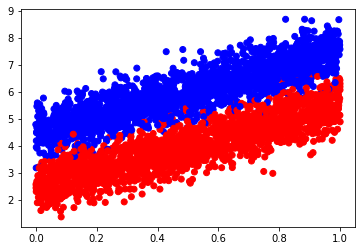

In [408]:
display_random_data(data_train, label_train)

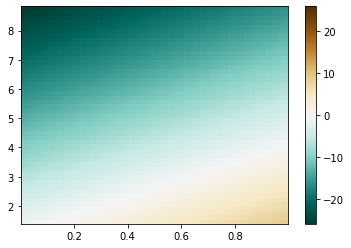

In [406]:
create_heatmap(weights, bias, data)